## 6장 8절 앙상블(Ensemble)

### scikit-learn의 ensemble.BaggingClassifier

In [1]:
import pandas as pd

df_breast = pd.read_csv('./data/breast-cancer.csv')
df_breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

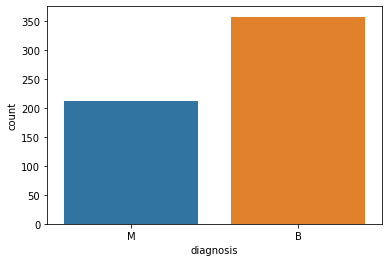

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x='diagnosis', data=df_breast)

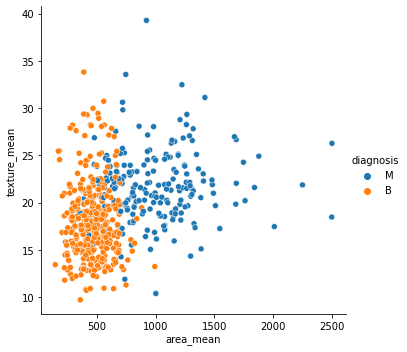

In [3]:
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=df_breast)

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

df_breast['diagnosis'] = np.where(df_breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'area_worst']
X = df_breast[features]
y = df_breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
pred = clf.fit(X_train, y_train).predict(X_test)
print('Accuracy score: ', clf.score(X_test, y_test))

Accuracy score:  0.9298245614035088


In [6]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]'])

,Pred[0],Pred[1]
True[0],102,5
True[1],7,57


<function matplotlib.pyplot.show(close=None, block=None)>

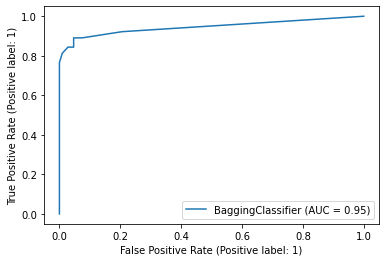

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show

In [8]:
clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(X, y).oob_score_
print(oob)

0.9086115992970123


C:\Users\djimm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\djimm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


### scikit-learn의 ensemble.BaggingRegressor

In [9]:
import pandas as pd

df_car = pd.read_csv('./data/CarPrice_Assignment.csv')
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
car_num = df_car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))
X = car_num[features]
y = car_num['price']

print(X.shape, y.shape)

(205, 13) (205,)


In [12]:
car_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)

reg = reg.fit(X,y)
reg.oob_score_

C:\Users\djimm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.8990913097014264

### 부스팅(Boosting)

### scikit-learn의 ensemble.AdaBoostClassifier

In [14]:
import pandas as pd

df_breast = pd.read_csv('./data/breast-cancer.csv')
df_breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

df_breast['diagnosis'] = np.where(df_breast['diagnosis'] == 'M', 1, 0)

features = ['area_mean', 'texture_mean']
X = df_breast[features]
y = df_breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(398, 2) (171, 2) (398,) (171,)


In [16]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=None)
pred = clf.fit(X_train, y_train).predict(X_test)
print('정확도: ', clf.score(X_test, y_test))

정확도:  0.9122807017543859


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_cm = confusion_matrix(y_true=y_test, y_pred = pred)
test_acc = accuracy_score(y_true=y_test, y_pred = pred)
test_rcll = recall_score(y_true=y_test, y_pred = pred)
test_prc = precision_score(y_true=y_test, y_pred = pred)
test_f1 = f1_score(y_true=y_test, y_pred = pred)

print(test_cm)
print('\n')
print('정확도: {}%'.format(round(test_acc*100,2)))
print('정al도: {}%'.format(round(test_prc*100,2)))
print('정확도: {}%'.format(round(test_rcll*100,2)))

[[102   5]
 [ 10  54]]


정확도: 91.23%
정al도: 91.53%
정확도: 84.38%


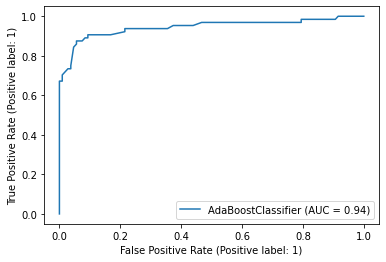

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [23]:
importances = clf.feature_importances_

column_nm = pd.DataFrame(features)

feature_imp = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)

feature_imp.columns = ['feature_nm', 'importances']
feature_imp

,feature_nm,importances
0,area_mean,0.56
1,texture_mean,0.44


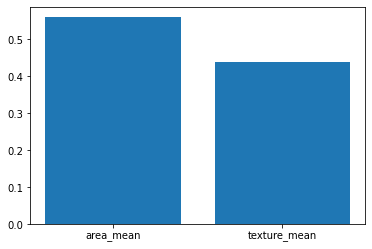

In [24]:
f = features

xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)
plt.show()

### scikit-learn의 ensemble.AdaBoostRegressor

In [25]:
df_car = pd.read_csv('./data/CarPrice_Assignment.csv')
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
df_car_num = df_car.select_dtypes(include='number')
df_car_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
df_X = df_car_num.drop(columns=['car_ID', 'symboling', 'price'])
df_Y = df_car_num['price']

In [33]:
df_X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [34]:
df_Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [40]:
from sklearn.ensemble import AdaBoostRegressor
import numpy as np

adaReg = AdaBoostRegressor(base_estimator=None)

pred = adaReg.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_true= y_test, y_pred = pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
acc = adaReg.score(X_test, y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('MAE\t{}'.format(round(mae,3)))
print('Accuracy score\t{}%'.format(round(acc*100,3)))


MSE	5700484.142
RMSE	2387.569
MAE	1816.243
Accuracy score	90.558%


In [49]:
f = pd.DataFrame(df_X.columns)         
f

,0
0,wheelbase
1,carlength
2,carwidth
3,carheight
4,curbweight
5,enginesize
6,boreratio
7,stroke
8,compressionratio
9,horsepower


In [50]:
f_imp = adaReg.feature_importances_
f_imp

array([0.01865009, 0.00854972, 0.059915  , 0.00376941, 0.07196011,
       0.67673054, 0.01529905, 0.01255434, 0.00308255, 0.06371907,
       0.0060921 , 0.00660229, 0.05307572])

In [57]:
df_fImp = pd.concat((f, pd.DataFrame(f_imp)), axis=1)
df_fImp.columns = ['features', 'importances']
df_fImp

,features,importances
0,wheelbase,0.018650
1,carlength,0.008550
2,carwidth,0.059915
3,carheight,0.003769
4,curbweight,0.071960
5,enginesize,0.676731
6,boreratio,0.015299
7,stroke,0.012554
8,compressionratio,0.003083
9,horsepower,0.063719


In [58]:
import matplotlib.pyplot as plt

n_features = X_train.shape[1]
n_features

13

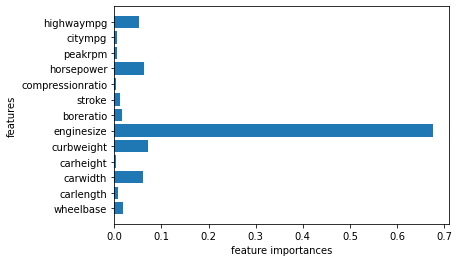

In [59]:
plt.barh(range(n_features), f_imp, align='center')
plt.yticks(np.arange(n_features), df_X.columns)
plt.xlabel('feature importances')
plt.ylabel('features')
plt.ylim(-1, n_features)
plt.show()

## 랜덤포레스트(Random Forest)

In [60]:
df_breast = pd.read_csv('./data/breast-cancer.csv')
df_breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [61]:
df_breast['diagnosis'] = np.where(df_breast['diagnosis']=='M', 1, 0)
df_breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [62]:
feature = ['area_mean', 'texture_mean']
df_X = df_breast[feature]
df_Y = df_breast['diagnosis']

In [63]:
df_X

,area_mean,texture_mean
0,1001.0,10.38
1,1326.0,17.77
2,1203.0,21.25
3,386.1,20.38
4,1297.0,14.34
...,...,...
564,1479.0,22.39
565,1261.0,28.25
566,858.1,28.08
567,1265.0,29.33


In [64]:
df_Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, stratify=df_Y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [71]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = rfclf.fit(X_train, y_train).predict(X_test)
rfclf.score(X_test, y_test)

0.9005847953216374

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_cm = confusion_matrix(y_true = y_test, y_pred=pred)
test_acc = accuracy_score(y_true = y_test, y_pred=pred)
test_pre = precision_score(y_true = y_test, y_pred=pred)
test_rcll = recall_score(y_true = y_test, y_pred=pred)
test_f1 = f1_score(y_true = y_test, y_pred=pred)

print(test_cm)
print('\n')
print('Accuracy score: {}%'.format(round(test_acc*100,2)))
print('Precision score: {}%'.format(round(test_pre*100,2)))
print('Recall score: {}%'.format(round(test_rcll*100,2)))
print('F1 score: {}%'.format(round(test_f1*100,2)))


[[103   4]
 [ 13  51]]


Accuracy score: 90.06%
Precision score: 92.73%
Recall score: 79.69%
F1 score: 85.71%


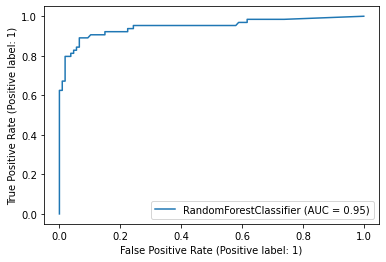

In [79]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(rfclf, X_test, y_test)


In [80]:
f_imp = rfclf.feature_importances_
df_f = pd.DataFrame(feature)

df_fImp = pd.concat((df_f, pd.DataFrame(f_imp)), axis=1)
df_fImp

,0,0
0,area_mean,0.710489
1,texture_mean,0.289511


In [81]:
df_fImp.columns = ['feature', 'importances']
df_fImp

,feature,importances
0,area_mean,0.710489
1,texture_mean,0.289511


In [86]:
xtick_label_position = list(range(len(feature)))
xtick_label_position

[0, 1]

[0, 1]

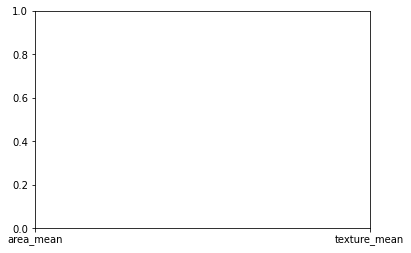

In [85]:
plt.xticks(xtick_label_position, feature)

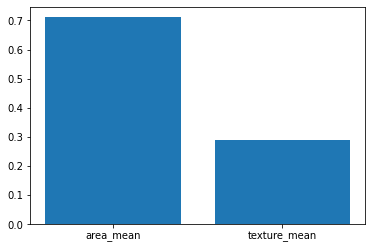

In [84]:
plt.bar([x for x in range(len(f_imp))], f_imp)
plt.show()

### scikit-learn의 ensemble.RandomForestRegressor

In [87]:
df_car = pd.read_csv('./data/CarPrice_Assignment.csv')
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [93]:
df_car_num = df_car.select_dtypes(include='number')
feature = list(df_car_num.columns.difference(['car_ID', 'symboling', 'price']))
feature

['boreratio',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'stroke',
 'wheelbase']

In [94]:
df_X = df_car_num[feature]
df_Y = df_car_num['price']

In [91]:
df_X

,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,stroke,wheelbase
0,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,2.68,88.6
1,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,2.68,88.6
2,2.68,52.4,171.2,65.5,19,9.0,2823,152,26,154,5000,3.47,94.5
3,3.19,54.3,176.6,66.2,24,10.0,2337,109,30,102,5500,3.40,99.8
4,3.19,54.3,176.6,66.4,18,8.0,2824,136,22,115,5500,3.40,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3.78,55.5,188.8,68.9,23,9.5,2952,141,28,114,5400,3.15,109.1
201,3.78,55.5,188.8,68.8,19,8.7,3049,141,25,160,5300,3.15,109.1
202,3.58,55.5,188.8,68.9,18,8.8,3012,173,23,134,5500,2.87,109.1
203,3.01,55.5,188.8,68.9,26,23.0,3217,145,27,106,4800,3.40,109.1


In [95]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [96]:
from sklearn.ensemble import RandomForestRegressor
rfReg = RandomForestRegressor()

pred = rfReg.fit(X_train, y_train).predict(X_test)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_true = y_test, y_pred = pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true = y_test, y_pred = pred)
acc = rfReg.score(X_test,y_test)

print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse,2)))
print('MAE: {}'.format(round(mae,2)))
print('ACC: {}%'.format(round(acc*100, 3)))

MSE: 4049238.94
RMSE: 2012.27
MAE: 1330.88
ACC: 93.293


In [99]:
f_imp = rfReg.feature_importances_
df_f = pd.DataFrame(data=feature)

df_fImp = pd.concat((df_f, pd.DataFrame(f_imp)), axis=1)
df_fImp.columns=['feature', 'importances']
df_fImp

,feature,importances
0,boreratio,0.004466
1,carheight,0.003955
2,carlength,0.008662
3,carwidth,0.020370
4,citympg,0.008129
5,compressionratio,0.003460
6,curbweight,0.214721
7,enginesize,0.627632
8,highwaympg,0.066354
9,horsepower,0.017241


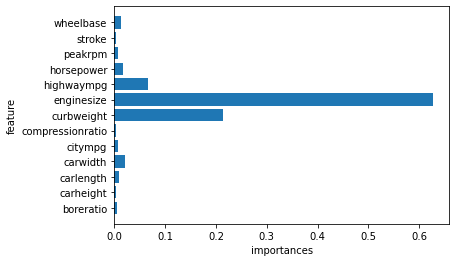

In [103]:
plt.barh(range(len(feature)), f_imp, align='center')
plt.yticks(np.arange(len(feature)), feature)
plt.xlabel('importances')
plt.ylabel('feature')
plt.show()